## Logistic Regression with Scikit Learn

> Coursera: Developing AI Applications on Azure

In [1]:
#install necessary packages
import numpy as np
import matplotlib.pyplot as plt

#install sklearn modules
from sklearn import datasets, svm, metrics, linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Load the data and look at how it is structured:

digits = datasets.load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [3]:
#digits

In [4]:
print(type(digits["data"]))
print(type(digits["target"]))
print(digits["DESCR"])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and

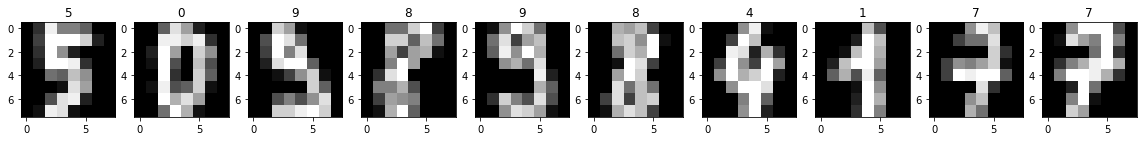

In [5]:
#Let's take a look at some images and the labels:

plt.figure(figsize=(20,10))
for element, (image, label) in enumerate (zip(digits.data[35:45],digits.target[35:45])):
    plt.subplot(1,10,element+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title("%i" % label)

In [6]:
#Let's split out data into train-test 

d_train, d_test, l_train, l_test = train_test_split(digits.data, digits.target, 
                                                    test_size=0.25, random_state=1)

In [7]:
#import the model
#Let's try logistic regression first
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
print(type(lr_model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [8]:
#Run a fit on the training data to train the model
lr_model.fit(d_train, l_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#Make prediction on the training model

lr_model.predict(d_test[0].reshape(1,-1))

array([1])

In [10]:
#do this on multiple points

lr_model.predict(d_test[0:20])

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4])

In [11]:
#Let's try a different classifier (Support Vector Machine)
#https://scikit-learn.org/stable/modules/svm.html

svm_model = svm.SVC(gamma=0.001) #The higher the gamma value it tries to exactly fit the training data
svm_model.fit(d_train, l_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
svm_model.predict(d_test[0].reshape(1,-1))

array([1])

In [13]:
svm_model.predict(d_test[0:20])

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4])